$$
Machine Learning Project - 1:
$$

**Building a Prediction model for banking loan approval info for a Nationalized Bank.**

Problem Statement:

Distribution of the loans is the core business part of almost every bank. The major portion of the bank’s assets directly came from the profit earned from the loans distributed by the banks. Today many banks and financial companies approve loans after a rigorous process of verification and validation but still there is no surety whether the chosen applicant is the deserving right applicant out of all applicants. This is project one of the bank wanted to build a model to predict whether that particular applicant’s loan can be approved or rejected.

Based on the above fields students has to create data and develop a prediction model for loan approval/rejection.


**Lifecycle of A Data Science Project:**


    1. Data Collection
    2. Exploratory Data Analysis
    3. Feature Engineering
    4. Feature Selection
    5. Model Building and Tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

$$
1 - Data Collection :
$$
 
    Since the dataset is already available. We will use the same and process the data as per the client requirements.

In [2]:
df= pd.read_csv("ML Project 1 Dataset.CSV")

In [3]:
df.head()

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,12345,0,YES,1,0,31,F,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,NO,1,1,40,F,2,1,1,0,1,1,12,2,0.619077,24,0
2,12349,0,YES,1,0,27,F,3,0,0,1,2,2,72,0,0.848949,36,0
3,12351,2,NO,1,1,33,M,2,0,1,0,2,1,120,1,0.515646,12,0
4,12353,2,NO,1,1,29,F,1,0,1,1,2,1,24,2,0.614123,24,1


In [4]:
df.tail()

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
13294,38933,0,YES,1,0,36,M,3,1,0,0,1,0,24,0,0.840564,24,1
13295,38935,2,NO,1,1,29,F,1,0,1,0,4,1,25,2,0.450000,12,1
13296,38937,0,YES,1,1,28,F,0,0,1,0,2,1,13,2,0.593333,36,1
13297,38939,0,YES,1,1,28,F,0,0,1,1,3,1,13,2,0.106667,36,0
13298,38941,2,NO,1,1,35,F,1,0,1,2,4,0,14,3,0.083333,36,0


$$
2 - Exploratory Data Analysis :
$$
In this stage we will perform the EDA and try to find the insights from the data.

In [5]:
df.shape

(13299, 18)

In the following steps, we will find:
1. Missing Values
2. All The Numerical Variables
3. Categorical Variables
4. Outliers
5. Relationship between independent and dependent variables

In [6]:
df.isnull().sum()   #There is no Missing values found in the data but there is some blank spaes in columns name

APP_ID                 0
 CIBIL_SCORE_VALUE     0
NEW_CUST               0
CUS_CATGCODE           0
 EMPLOYMENT_TYPE       0
AGE                    0
 SEX                   0
 NO_OF_DEPENDENTS      0
 MARITAL               0
 EDU_QUA               0
  P_RESTYPE            0
 P_CATEGORY            0
 EMPLOYEE_TYPE         0
  MON_IN_OCC           0
 INCOM_EXP_GMI         0
LTV                    0
 TENURE                0
STATUS                 0
dtype: int64

In [7]:
#This lambda function is used for removing the spaces from columns name
df = df.rename(columns=lambda x: x.strip())

In [8]:
df.columns

Index(['APP_ID', 'CIBIL_SCORE_VALUE', 'NEW_CUST', 'CUS_CATGCODE',
       'EMPLOYMENT_TYPE', 'AGE', 'SEX', 'NO_OF_DEPENDENTS', 'MARITAL',
       'EDU_QUA', 'P_RESTYPE', 'P_CATEGORY', 'EMPLOYEE_TYPE', 'MON_IN_OCC',
       'INCOM_EXP_GMI', 'LTV', 'TENURE', 'STATUS'],
      dtype='object')

In [9]:
numarical_values= [feature for feature in df.columns if df[feature].dtype!='O' ]

In [10]:
numarical_values
print(len(numarical_values))

16


In [11]:
categorical_values=[feature for feature in df.columns if df[feature].dtype=="O"]

In [12]:
print(len(categorical_values))

2


In [13]:
for feature in categorical_values:
    print(feature,'- Total categories in the categorical variable are', len(df[feature].unique()))

NEW_CUST - Total categories in the categorical variable are 2
SEX - Total categories in the categorical variable are 2


<Axes: >

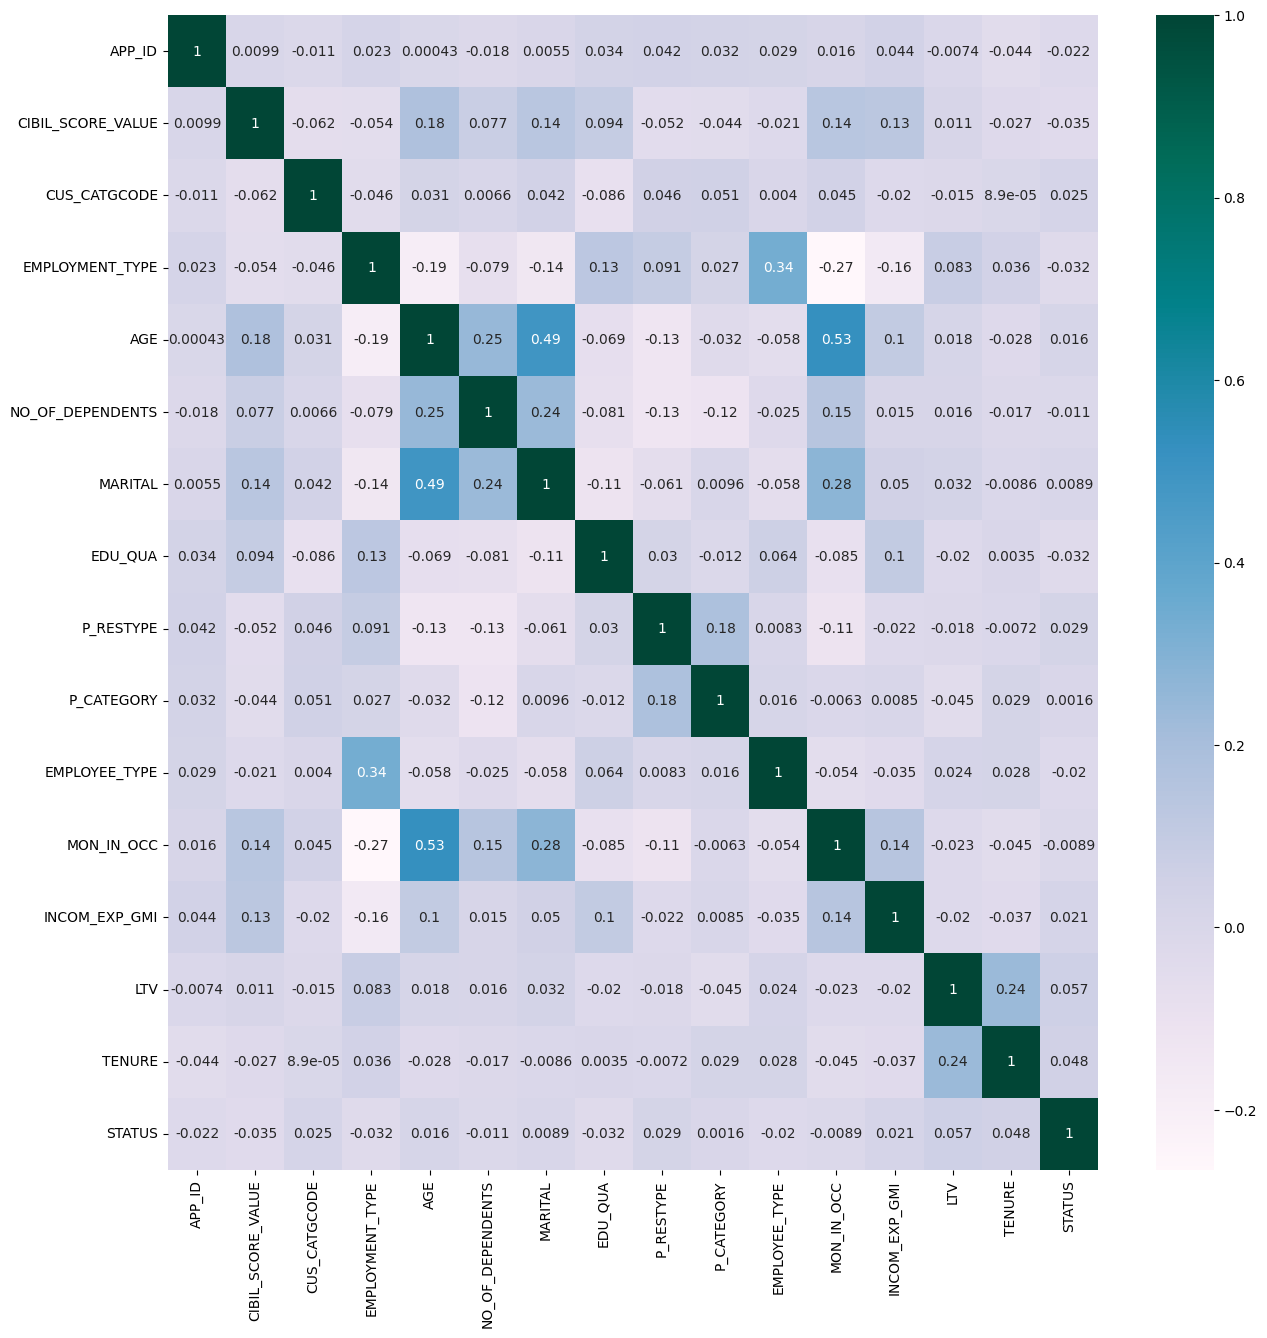

In [14]:
plt.figure(figsize= (15,15))
sns.heatmap(df.corr(),annot=True, cmap="PuBuGn")

<Axes: xlabel='NEW_CUST', ylabel='count'>

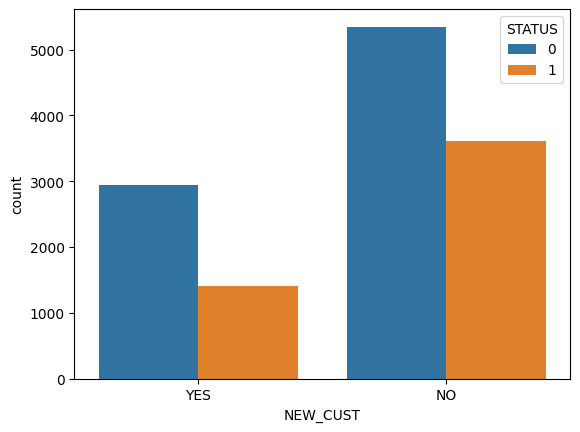

In [15]:
sns.countplot( x="NEW_CUST" ,hue= 'STATUS', data= df)

<Axes: xlabel='P_RESTYPE', ylabel='count'>

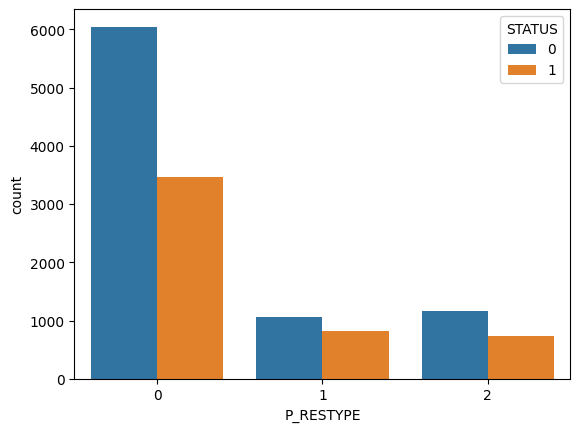

In [16]:
sns.countplot(x="P_RESTYPE",hue="STATUS",data=df)

<Axes: xlabel='P_CATEGORY', ylabel='count'>

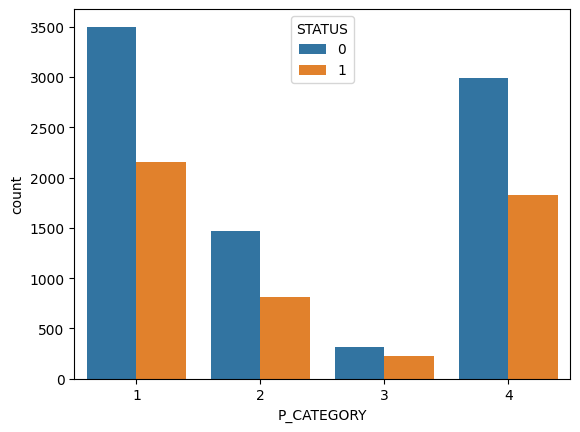

In [17]:
sns.countplot(x="P_CATEGORY",hue="STATUS",data=df)

<Axes: xlabel='STATUS', ylabel='count'>

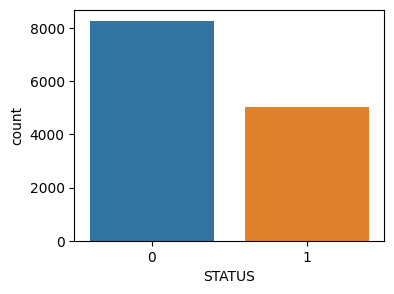

In [18]:
plt.figure(figsize=(4,3))
sns.countplot(x='STATUS', data=df)

<Axes: xlabel='AGE', ylabel='count'>

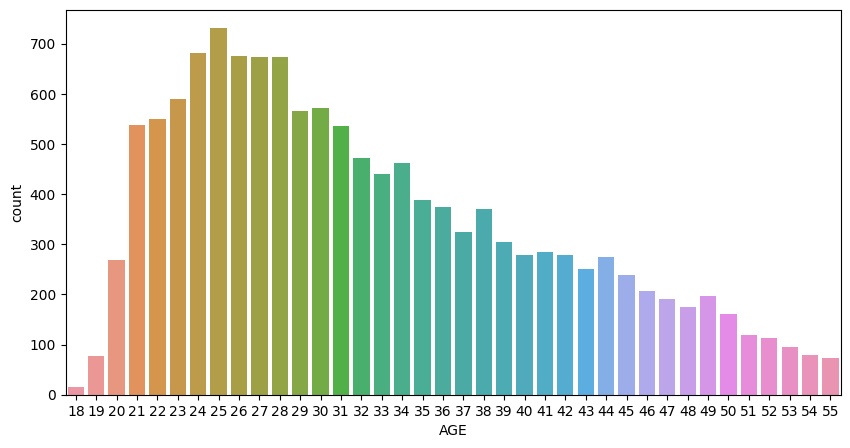

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='AGE', data=df)

<Axes: xlabel='SEX', ylabel='count'>

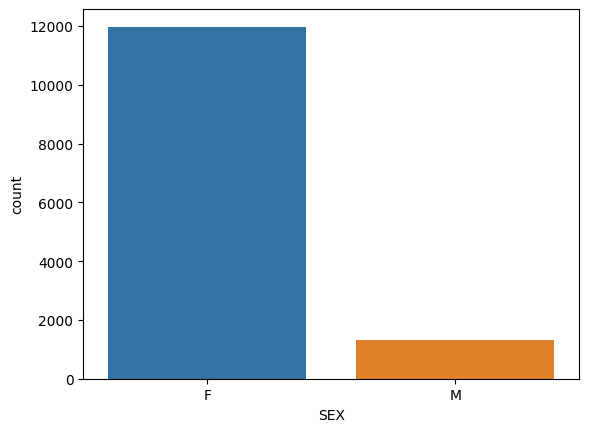

In [20]:
sns.countplot(x='SEX' ,data=df)

<Axes: xlabel='NO_OF_DEPENDENTS', ylabel='count'>

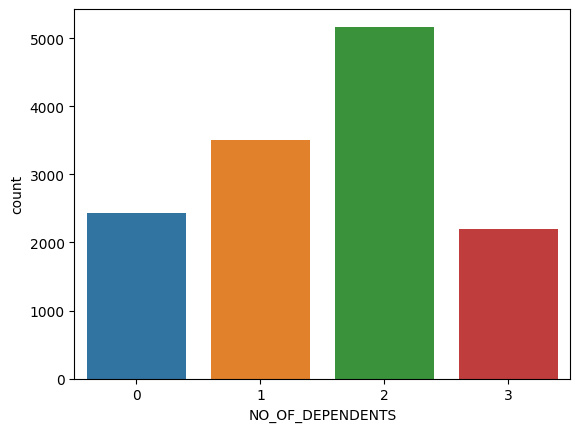

In [21]:
sns.countplot(x='NO_OF_DEPENDENTS' ,data=df)

<Axes: xlabel='MARITAL', ylabel='count'>

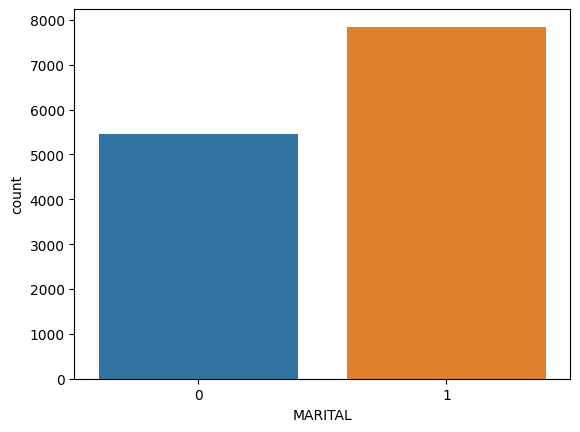

In [22]:
sns.countplot(x='MARITAL' ,data=df)

<Axes: xlabel='INCOM_EXP_GMI', ylabel='count'>

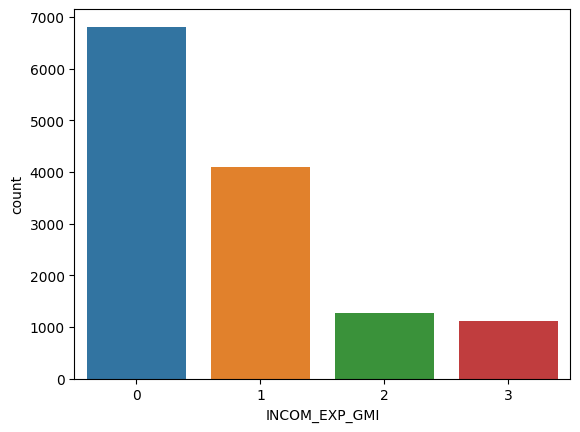

In [23]:
sns.countplot(x='INCOM_EXP_GMI' ,data=df)

Observations During the Exploratory Data Analysis

1. The Data has no missing values
2. There are Total 16 Numerical Variables
3. We have total 2 categorical variables that we will be worked accordingly during the feature engineering part
4. The huge diffrence in Gender, Income, Marital Status, New_cust data we need to balance the data for better results
5. As per the data the Married families having 2 or more number of dependents and with Low Income groups are the people applying more for loans
6. As per data the Applicants between the age of 21-40 are applying more for loans

$$
3. Feature Engineering and 4. Feature Selection
$$

In [24]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()      
df.NEW_CUST = label.fit_transform(df['NEW_CUST'])         # Apply the label encoding technique to convert the categorical variable into numarical variable
df.SEX= label.fit_transform(df['SEX'])         

In [25]:
df.head()

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,12345,0,1,1,0,31,0,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,0,1,1,40,0,2,1,1,0,1,1,12,2,0.619077,24,0
2,12349,0,1,1,0,27,0,3,0,0,1,2,2,72,0,0.848949,36,0
3,12351,2,0,1,1,33,1,2,0,1,0,2,1,120,1,0.515646,12,0
4,12353,2,0,1,1,29,0,1,0,1,1,2,1,24,2,0.614123,24,1


In [26]:
df.tail()

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
13294,38933,0,1,1,0,36,1,3,1,0,0,1,0,24,0,0.840564,24,1
13295,38935,2,0,1,1,29,0,1,0,1,0,4,1,25,2,0.450000,12,1
13296,38937,0,1,1,1,28,0,0,0,1,0,2,1,13,2,0.593333,36,1
13297,38939,0,1,1,1,28,0,0,0,1,1,3,1,13,2,0.106667,36,0
13298,38941,2,0,1,1,35,0,1,0,1,2,4,0,14,3,0.083333,36,0


In [27]:
# Since the App ID has no correlation with the Output Variable we will drop the App ID
df= df.drop('APP_ID', axis=1)  

In [28]:
# In this step will describe our variable X and Y
X= df.drop('STATUS', axis =1)
y= df['STATUS']

In [29]:
# In this step we will split the data into train and test datasets and the ratio is 30:70
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=13)

In [30]:
# In this step we will use the standar scaler to scale the data 
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [31]:
print(X_train)
print(X_test)

[[-1.20225208  1.44413137 -3.12838461 ...  0.25893175  0.5773925
  -0.10275671]
 [-1.20225208  1.44413137  0.31965379 ... -0.80151508  0.54804277
  -0.10275671]
 [-1.20225208  1.44413137  0.31965379 ...  2.37982542  0.57441943
   1.50221343]
 ...
 [-1.20225208  1.44413137  0.31965379 ... -0.80151508 -1.16219119
  -1.70772684]
 [ 1.10723298 -0.69245778  0.31965379 ... -0.80151508 -0.31550815
   1.50221343]
 [-1.20225208  1.44413137 -3.12838461 ... -0.80151508 -0.51829018
   1.50221343]]
[[ 1.12253206 -0.70312305  0.311057   ...  2.43597363  0.35148131
  -0.11224059]
 [ 1.12253206 -0.70312305  0.311057   ...  1.35782224  0.13907641
  -0.11224059]
 [-0.03510633 -0.70312305 -3.21484483 ... -0.79848054  0.2987991
   1.4758443 ]
 ...
 [-0.03510633 -0.70312305  0.311057   ... -0.79848054  0.84557298
  -0.11224059]
 [-1.19274471  1.42222617  0.311057   ... -0.79848054 -1.19951262
  -0.11224059]
 [ 1.12253206 -0.70312305  0.311057   ... -0.79848054  0.99193614
  -0.11224059]]


$$
5. Model Building and Model Tunning
$$

In [32]:
#now we import the some classification ML Algorithams for train the model and we also campare the all model accuracy.

#Classifiers Used
from sklearn.ensemble import VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from xgboost import plot_importance
from sklearn.svm import SVC

#Tools used for Model evaluation
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

LogisticRegression:

In [33]:
logistic_regression = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression::::::::::",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76      3315
           1       0.25      0.55      0.34       675

    accuracy                           0.65      3990
   macro avg       0.56      0.61      0.55      3990
weighted avg       0.77      0.65      0.69      3990

Logistic Regression:::::::::: 0.6451127819548872


Support Vector Classification:

In [34]:
SVM = SVC(kernel="linear",class_weight='balanced',probability=True)
SVM.fit(X_train,y_train)
y_pred=SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("Support Vector Classification::::::::::",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      2870
           1       0.42      0.56      0.48      1120

    accuracy                           0.66      3990
   macro avg       0.61      0.63      0.62      3990
weighted avg       0.70      0.66      0.67      3990

Support Vector Classification:::::::::: 0.662406015037594


RandomForestClassifier:

In [35]:
rf = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier::::::::::",accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.82      0.69      0.75      2974
           1       0.38      0.55      0.45      1016

    accuracy                           0.66      3990
   macro avg       0.60      0.62      0.60      3990
weighted avg       0.71      0.66      0.67      3990

RandomForestClassifier:::::::::: 0.655889724310777


DecisionTreeClassifier:

In [36]:
Dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10, random_state=27, splitter='best')
Dt.fit(X_train,y_train)
y_pred = Dt.predict(X_test)
print(classification_report(y_pred,y_test))
print("Decision Tree Classifier::::::::::",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76      2981
           1       0.40      0.59      0.48      1009

    accuracy                           0.68      3990
   macro avg       0.62      0.65      0.62      3990
weighted avg       0.73      0.68      0.69      3990

Decision Tree Classifier:::::::::: 0.675187969924812


KNeighborsClassifier:

In [37]:
KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:::::::::::",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      3452
           1       0.18      0.50      0.26       538

    accuracy                           0.63      3990
   macro avg       0.54      0.57      0.51      3990
weighted avg       0.80      0.63      0.69      3990

KNeighborsClassifier::::::::::: 0.6283208020050125


Hyper Parameter Tuning

In [38]:
# LogisticRegression

grid={"C":np.logspace(0.1,0.4,4), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(random_state=0, solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=10, scoring = "accuracy", n_jobs =6,verbose = 1)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Logistic Regression::::::::::",logreg_cv.best_score_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
tuned hpyerparameters :(best parameters)  {'C': 1.9952623149688797, 'penalty': 'l2'}
Logistic Regression:::::::::: 0.6423886906205606


In [39]:
# RandomForestClassifier

rf_test = {"max_depth": [3,4,5],
           "n_estimators" :[100,300,500,600],
           "min_samples_leaf":[10,15]}

tuning = GridSearchCV(RandomForestClassifier(), param_grid = rf_test, scoring = 'accuracy', n_jobs = 6)
tuning.fit(X_train,y_train)
rf_best = tuning.best_estimator_
print("Random Forest::::::::::" , tuning.best_score_)

Random Forest:::::::::: 0.6603281443802952


In [40]:
tuning.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 600}

In [41]:
# DecisionTreeClassifier

y_pred = tuning.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier::::::::::",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      3249
           1       0.31      0.61      0.41       741

    accuracy                           0.67      3990
   macro avg       0.60      0.65      0.59      3990
weighted avg       0.78      0.67      0.70      3990

DecisionTreeClassifier:::::::::: 0.6711779448621554


In [42]:
# KNeighborsClassifier

param_grid_knn = {"n_neighbors": list(range(1,200))}

gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, verbose=1, n_jobs=6, scoring = "accuracy")
gs_knn.fit(X_train, y_train)

knn_best = gs_knn.best_estimator_

print("KNN::::::::::",gs_knn.best_score_)

gs_knn.best_params_

Fitting 5 folds for each of 199 candidates, totalling 995 fits
KNN:::::::::: 0.629605486811371


{'n_neighbors': 40}

In [43]:
# DecisionTreeClassifier


tree_param = {'criterion': ['entropy', 'gini'], 
               'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
             "min_samples_leaf":list(range(1,80,10))}
              
gsDTC = GridSearchCV(DecisionTreeClassifier(), param_grid = tree_param, cv = 5, scoring = "accuracy", n_jobs = 6, verbose = 1)
gsDTC.fit(X_train,y_train)

dtc_best = gsDTC.best_estimator_
print("Decision tree classifier::::::::::",gsDTC.best_score_)

y_pred = gsDTC.predict(X_test)
print(classification_report(y_pred,y_test))

print("DecisionTreeClassifier::::::::::",accuracy_score(y_pred,y_test))

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
Decision tree classifier:::::::::: 0.6678495963559777
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      2919
           1       0.43      0.59      0.49      1071

    accuracy                           0.68      3990
   macro avg       0.63      0.65      0.63      3990
weighted avg       0.72      0.68      0.69      3990

DecisionTreeClassifier:::::::::: 0.6771929824561403


**$$Summary Report$$**

**Performance of the Normal Model is as follows:**

Logistic Regression: 0.6451127819548872

Support Vector Classification: 0.662406015037594

RandomForestClassifier: 0.655889724310777

Decision Tree Classifier: 0.675187969924812

KNeighborsClassifier: 0.6283208020050125

**Performace of the Models after Hyper Parameter tuning is as follows:**

Logistic Regression: 0.6423886906205606

Random Forest: 0.6605431403025872

KNN: 0.629605486811371

DecisionTreeClassifier: 0.6771929824561403

# Based on the above results we Can select either Decision tree classifier or Randomforest after hyper patameter tunning because both the algorithms are giving almost equal and best result of them all.